# **Assignment 2 Data Preprocessing**

**Chosen Dataset: House Prices**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Path dataset
train_path = 'datasets/train.csv'

house_data = pd.read_csv(train_path)

In [3]:
house_data.shape

(1460, 81)

# **1. Exploratory Data Analysis**

Steps to achieve during this process:

1. Understand the data
2. Check missing and null values
3. Understand data distribution, search outlier, and comprehend correlation

**1.1. Understanding Dataset**

In [4]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_data_num = house_data.select_dtypes('number')
house_data_num = house_data_num.drop(['Id'], axis=1)
print(f"Numerical data column amount: {len(house_data_num.columns)}")
house_data_num.columns

Numerical data column amount: 37


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
house_data_num.describe().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [7]:
house_data_cat = house_data.select_dtypes('object')
print(f"Categorical data column amount: {len(house_data_cat.columns)}")
house_data_cat.columns

Categorical data column amount: 43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
house_data_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


**1.2. Check Missing Values on house_data**

In [9]:
nan_val = house_data.isna().sum().sort_values(ascending=False).head(20)
nan_val

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

**1.3. Understand Data Distribution and Search Outliers**

In [10]:
# split data into numerical and categorical
house_num = house_data.select_dtypes('number').drop(['SalePrice', 'Id'], axis=1).copy()
house_cat = house_data.select_dtypes('object').copy()
house_target = house_data.SalePrice

**1.3.1. Numerical Data**

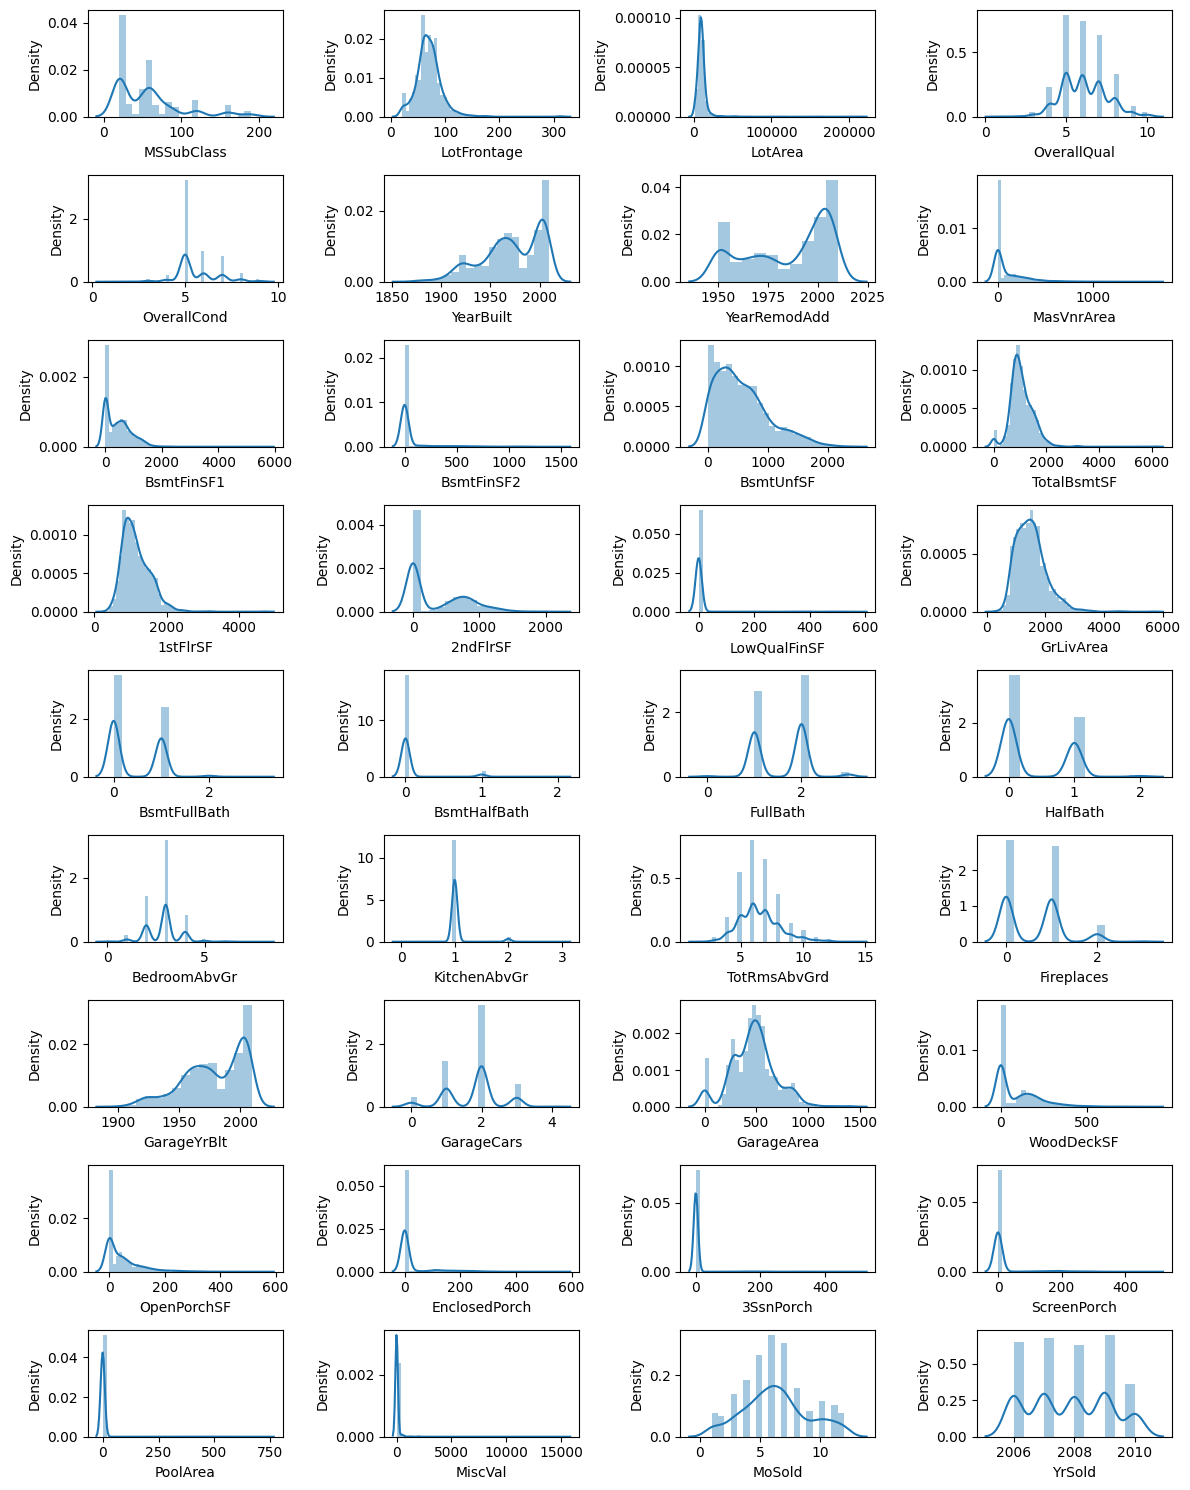

In [11]:
fig = plt.figure(figsize=(12,15))
for i, column in enumerate(house_num.columns):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(house_num[column].dropna())
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Some of the features with mostly 1 value from the plots above:

        BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

<Axes: xlabel='SalePrice', ylabel='Density'>

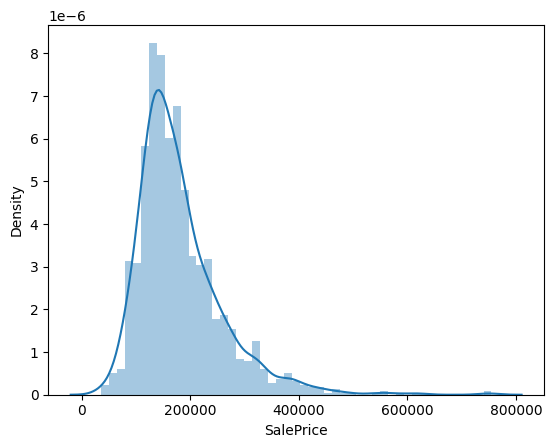

In [12]:
sns.distplot(house_target)

**Data Outliers**

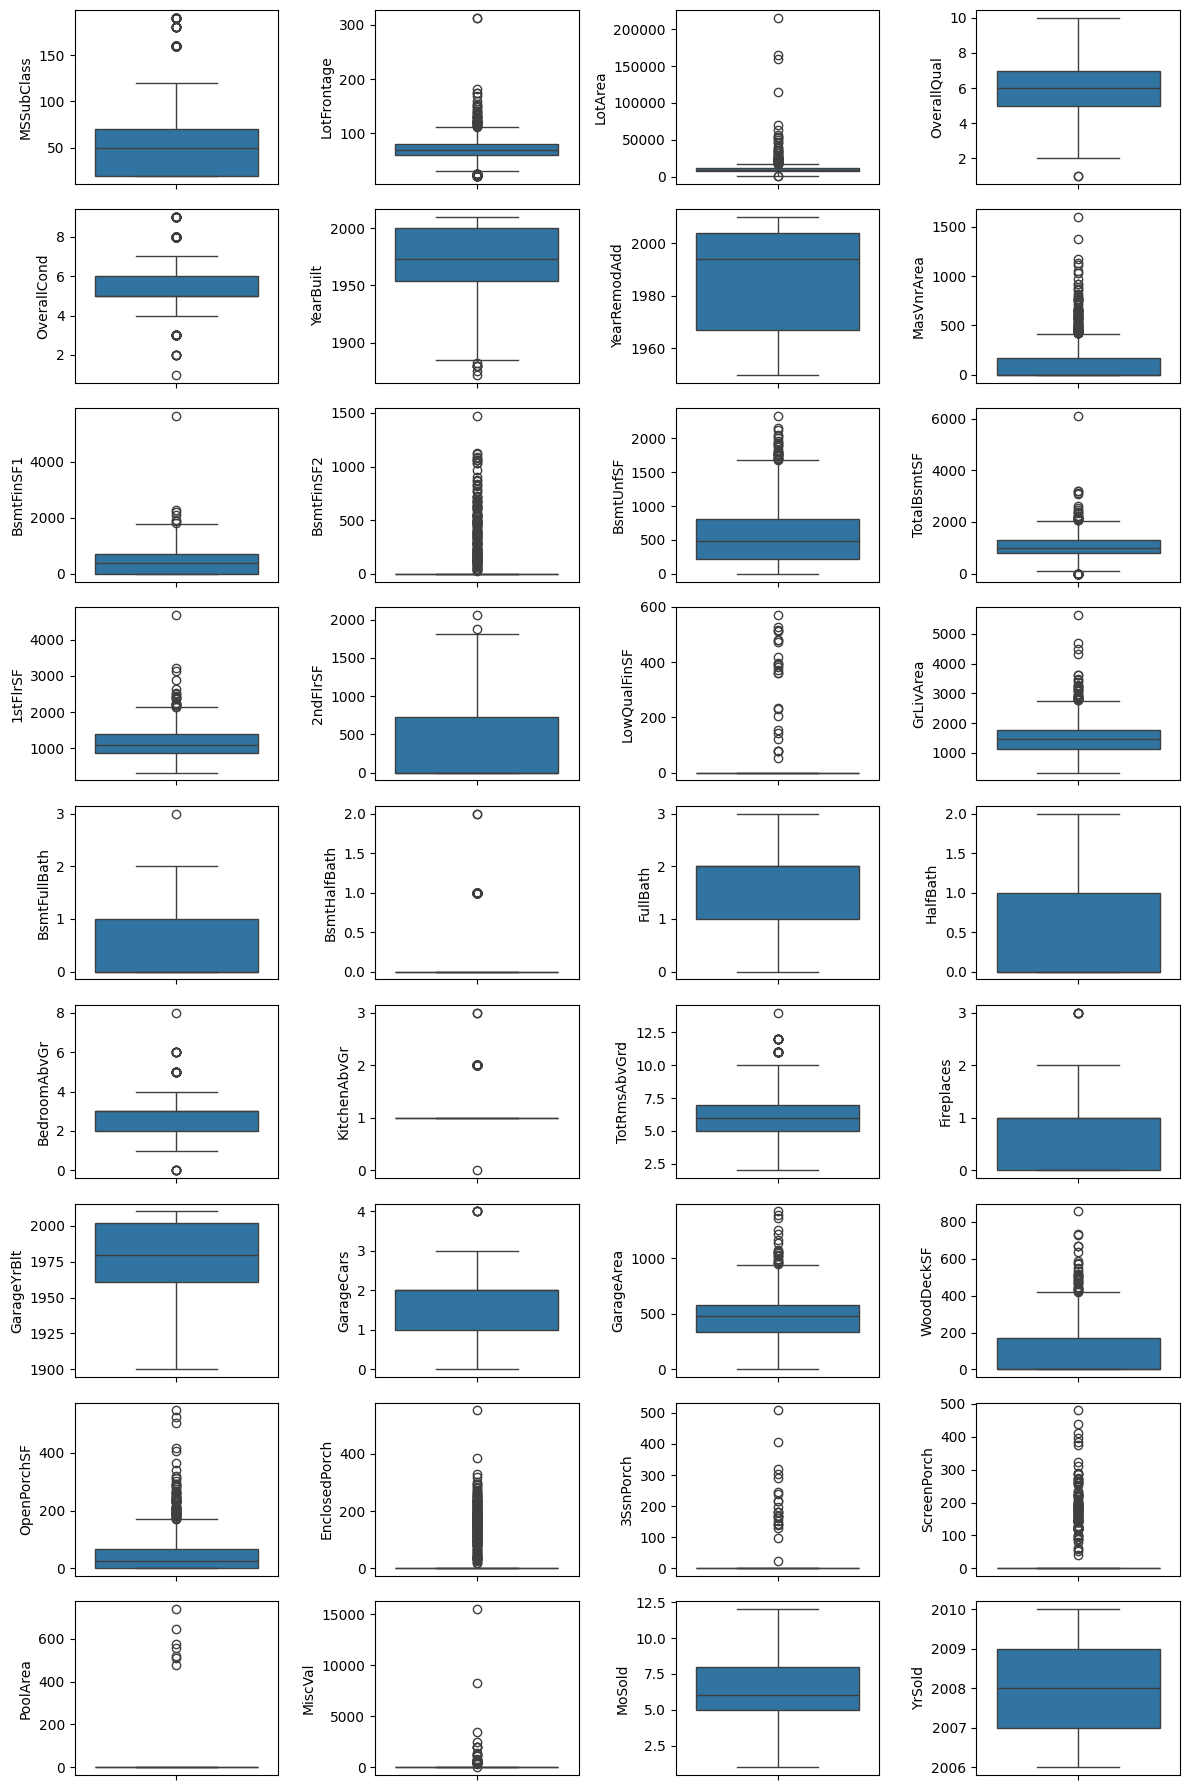

In [13]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(house_num.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=house_num.iloc[:,i])

plt.tight_layout()
plt.show()

Features with huge outlier to handle:

        LotFrontage, LotArea, MasVnrArea, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, GarageArea

**1.3.2. Categorical Data**

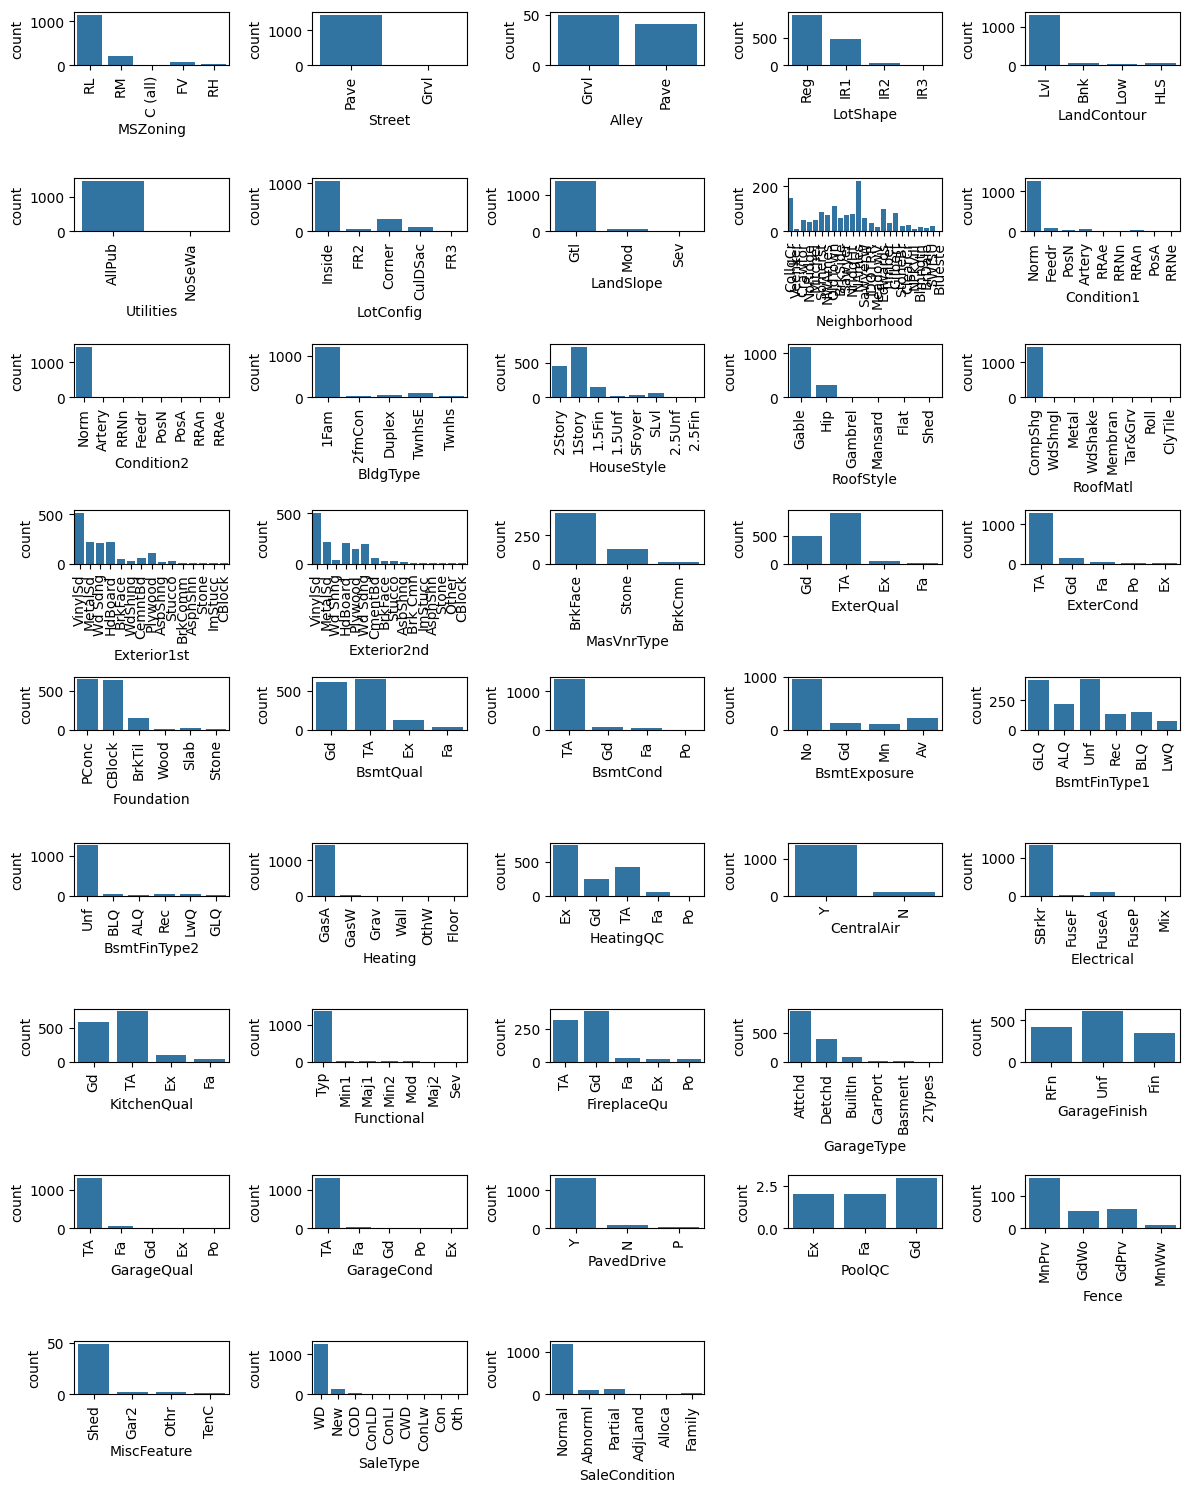

In [14]:
fig = plt.figure(figsize=(12,15))
for i, column in enumerate(house_cat.columns):
    fig.add_subplot(9, 5, i+1)
    sns.countplot(x=house_cat[column], data=house_cat.dropna())
    plt.xticks(rotation=90)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**1.4. Data Correlation**

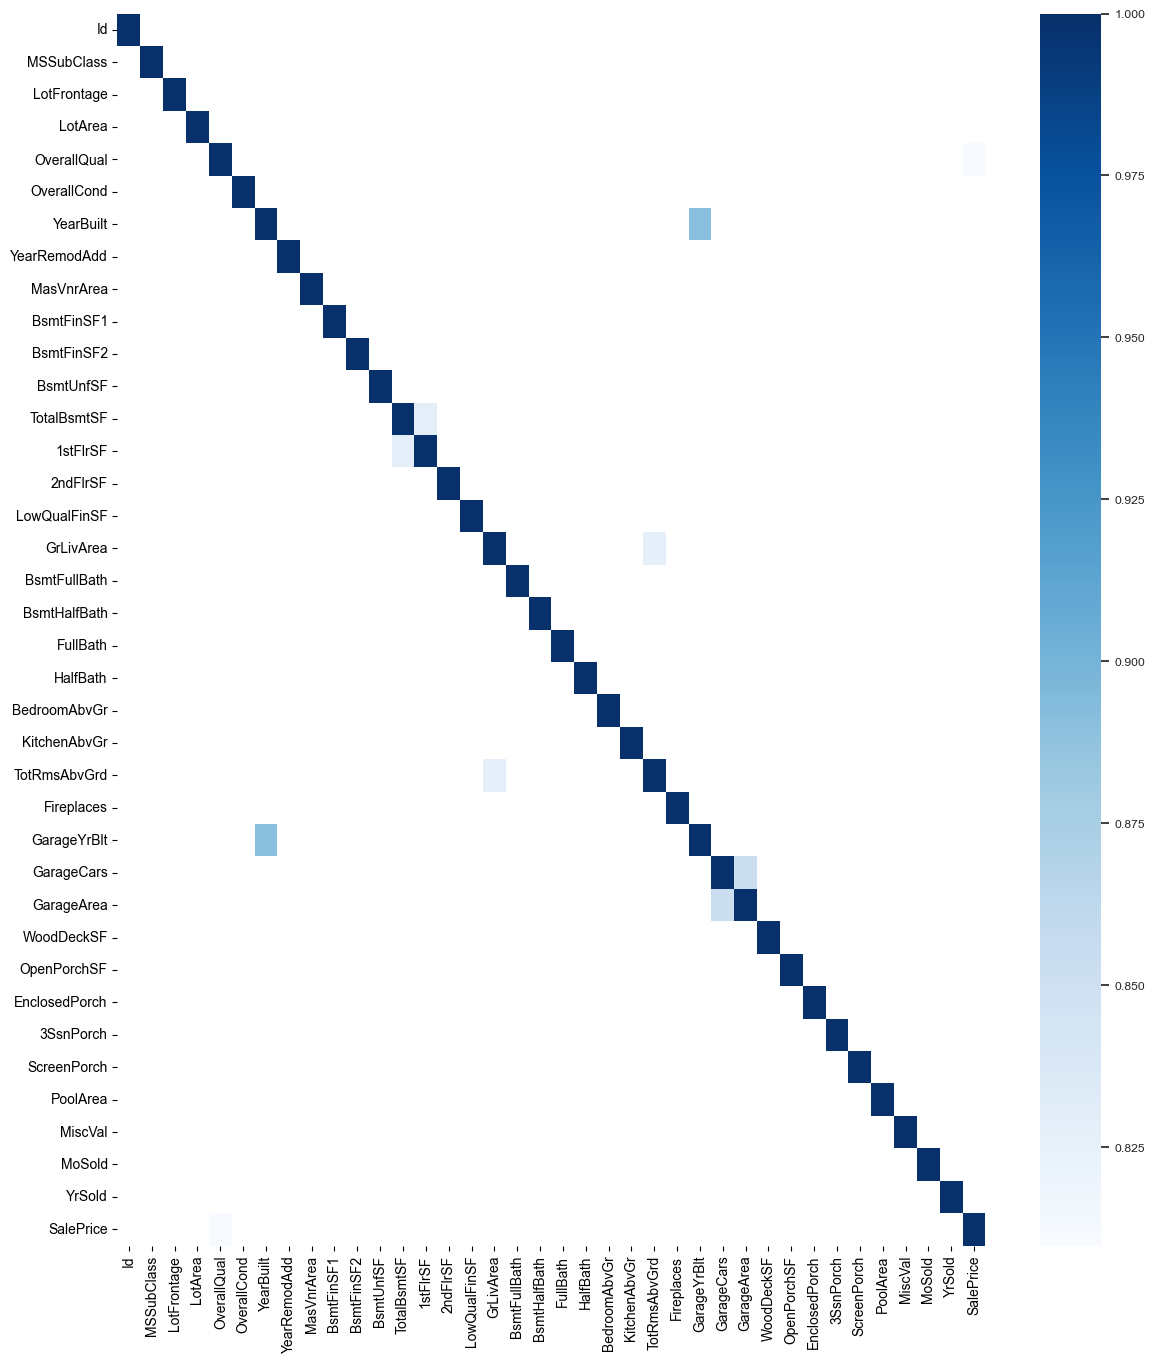

In [15]:
corr = house_data.select_dtypes(exclude=['object']).corr(method='spearman')

fig, ax = plt.subplots(figsize=(14, 16))
sns.set(font_scale=0.8)
sns.heatmap(corr, mask=corr<0.8, cmap='Blues')
plt.show()

In [16]:
corr['SalePrice'].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.421309
LotFrontage     0.409076
WoodDeckSF      0.353802
HalfBath        0.343008
BsmtFinSF1      0.301871
Name: SalePrice, dtype: float64

# **2. Data Cleaning and Preprocessing**

1. Dropping features with mostly 1 value
2. Handle with outliers previously mentioned during EDA
3. Handle missing values within dataset

**2.1. Dropping Features**

In [17]:
house_data_preprocessed = house_data.copy()

In [18]:
house_data_preprocessed = house_data_preprocessed.drop(['BsmtFinSF2'], axis=1)
house_data_preprocessed = house_data_preprocessed.drop(['LowQualFinSF'], axis=1)
house_data_preprocessed = house_data_preprocessed.drop(['EnclosedPorch'], axis=1)
house_data_preprocessed = house_data_preprocessed.drop(['3SsnPorch'], axis=1)
house_data_preprocessed = house_data_preprocessed.drop(['ScreenPorch'], axis=1)
house_data_preprocessed = house_data_preprocessed.drop(['PoolArea'], axis=1)
house_data_preprocessed = house_data_preprocessed.drop(['MiscVal'], axis=1)

**2.2. Handle Outliers**

In [19]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    outliers_low = df[column] < lower_lim
    outliers_up = df[column] > upper_lim
    
    df[column] = df[column][~(outliers_low | outliers_up)]
    return df

features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

for feature in features:
    house_data_preprocessed = handle_outliers(house_data_preprocessed, feature)

In [20]:
house_data_preprocessed.shape

(1460, 74)

**2.3. Handle Missing Values**

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# Drop features with huge missing values (>1000)
features_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

house_data_preprocessed = house_data_preprocessed.drop(features_to_drop, axis=1)

In [23]:
house_data_preprocessed.select_dtypes('number').isna().sum().sort_values(ascending=False).head(10)

LotFrontage     347
MasVnrArea      104
GarageYrBlt      81
LotArea          69
TotalBsmtSF      61
BsmtUnfSF        29
GarageArea       21
1stFlrSF         20
TotRmsAbvGrd      0
Fireplaces        0
dtype: int64

In [24]:
house_data_preprocessed.select_dtypes('object').isna().sum().sort_values(ascending=False).head(12)

MasVnrType      872
FireplaceQu     690
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
Electrical        1
dtype: int64

In [25]:
# Use 'mean' strategy on num
imputer = SimpleImputer(strategy='mean')
impute_num_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotArea', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', '1stFlrSF']

house_data_preprocessed[impute_num_features] = imputer.fit_transform(house_data_preprocessed[impute_num_features])

In [26]:
# Implement 'most_frequent' strategy on categorical columns
imputer = SimpleImputer(strategy='most_frequent')
impute_cat_features = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageCond', 
                     'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'Electrical']

house_data_preprocessed[impute_cat_features] = imputer.fit_transform(house_data_preprocessed[impute_cat_features])

In [27]:
house_data_preprocessed.isna().sum().any()

False

# **3. Feature Engineering**

1. Feature creation
2. Transform target feature using log transformation
3. Encode, Scale, and Split data

In [28]:
house_data_fe = house_data_preprocessed.copy()

**3.1. Feature Creation**

In [29]:
def apply_feature_creation(df):
    # Garage Rating
    GarageRatings = {
        'Ex': 90,
        'Gd': 80,
        'TA': 70,
        'Fa': 60,
        'Po': 50,
        'NA': 0  
    }
    df['Rt'] = df['GarageCond'].map(GarageRatings)
    df['GarageRate'] = ((df['Rt'] + 10 * df['GarageCars']) / 4).astype(int)

    min_rating = df['GarageRate'].min()
    max_rating = df['GarageRate'].max()
    df['GarageRate'] = ((df['GarageRate'] - min_rating) / (max_rating - min_rating)) * 9

    df['GarageRate'] += 1
    df['GarageRate'] = df['GarageRate'].round(1)
    df = df.drop('Rt', axis=1)

    # House Age
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']

    # Functional Score
    functional_scores = {
        'Typ': 5, 
        'Min1': 4,
        'Min2': 3,
        'Mod': 2, 
        'Maj1': 1,
        'Maj2': 0,
        'Sev': -1,
        'Sal': -2
    }

    df['FunctionalScore'] = df['Functional'].map(functional_scores)

    # Final House Rate
    bsmt_scores = {'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 1, 'NA': 0}
    functional_scores = {'Typ': 9, 'Min1': 7, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}

    df['BsmtCondScore'] = df['BsmtCond'].map(bsmt_scores)
    df['FunctionalScore'] = df['Functional'].map(functional_scores)
    df['OverallCondScaled'] = (df['OverallCond'] / 10) * 9 + 1

    df['FinalHouseRate'] = (df['BsmtCondScore'] + df['OverallCondScaled'] + df['FunctionalScore']) / 3
    df = df.drop(['OverallCondScaled'], axis=1)

    # Overall Category Condition
    def categorize_overall_cond(overall_cond):
        if overall_cond >= 8:
            return 'Excellent'
        elif 6 <= overall_cond <= 7:
            return 'Good'
        elif 4 <= overall_cond <= 5:
            return 'Average'
        else:
            return 'Poor'

    df['OverallCondCat'] = df['OverallCond'].apply(categorize_overall_cond)

    # Total Room Ratio Compared to LotArea
    df['TotRmsRatio'] = (df['TotRmsAbvGrd'] / df['LotArea']) * 1000

    # Has Basement and Has Central Air
    df['HasCentralAir'] = (df['CentralAir'] == 'Y').astype(int)
    df['HasBsmt'] = (df['BsmtCond'] != 'NA').astype(int)

    # Lot Area per Room
    df['LotAreaPerRoom'] = df['LotArea'] / df['TotRmsAbvGrd']

    # Add Latitude and Longitude features based on Neighborhood
    neighborhood_coordinates = {
        'Blmngtn': (42.05650378301724, -93.6348377620409),
        'Blueste': (42.00946680046094, -93.64649461940714),
        'BrDale': (42.05286916932342, -93.62819120213092),
        'BrkSide': (42.02945112593391, -93.62705169782492),
        'ClearCr': (42.06032666090379, -93.62728400583134),
        'CollgCr': (42.022377483090416, -93.65099268201057),
        'Crawfor': (42.010889603597384, -93.64120440583395),
        'Edwards': (42.01607756604796, -93.68108831532642),
        'Gilbert': (42.107129794305465, -93.65020279892208),
        'IDOTRR': (42.022081192249786, -93.6208591165699),
        'MeadowV': (41.9926158255337, -93.60230138069998),
        'Mitchel': (41.99033470471345, -93.60086432685569),
        'NAmes': (42.06075154768045, -93.64017133563065),
        'NoRidge': (42.0480557556472, -93.64740759281577),
        'NPkVill': (42.053701163832876, -93.6481210193244),
        'NridgHt': (42.05986868397084, -93.64806584547162),
        'NWAmes': (42.053777864651785, -93.65430162414769),
        'OldTown': (42.02937624499849, -93.6130979032944),
        'SWISU': (42.01960032109667, -93.64847944141043),
        'Sawyer': (42.03389403001612, -93.67704123836934),
        'SawyerW': (42.03688895664273, -93.67990042103351),
        'Somerst': (42.05263428479706, -93.64465002473004),
        'StoneBr': (42.059798387299374, -93.63729880021315),
        'Timber': (42.00005101360481, -93.6490363444622),
        'Veenker': (42.04173538546516, -93.64869285001119)
    }
    
    df['Latitude'] = df['Neighborhood'].map(lambda x: neighborhood_coordinates[x][0])
    df['Longitude'] = df['Neighborhood'].map(lambda x: neighborhood_coordinates[x][1])

    return df

In [31]:
house_data_fe = apply_feature_creation(house_data_fe)

In [34]:
house_data_fe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold

In [36]:
house_data_fe.to_csv('house_final.csv', index=False)

**3.2. Transforming Target Feature**

In [ ]:
house_data_fe['SalePrice']

SyntaxError: incomplete input (4006105192.py, line 1)

In [ ]:
house_data_fe['SalePrice'] = np.log(house_data_fe['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

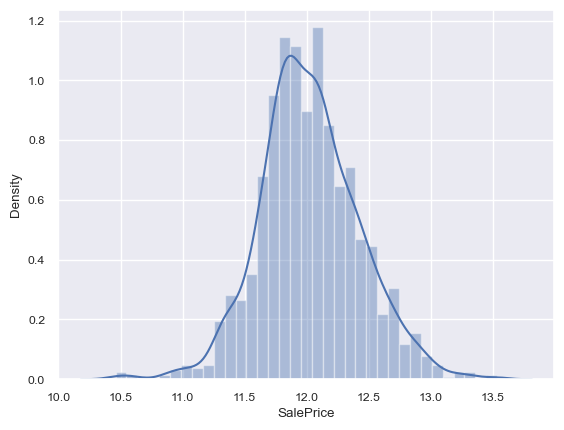

In [ ]:
sns.distplot(house_data_fe['SalePrice'])

In [ ]:
house_data_fe.to_csv('house_final.csv', index=False)

SyntaxError: incomplete input (1073903821.py, line 1)

**3.3. Splitting, Encoding, Scaling Data**

In [ ]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'OneHotEncod' from 'sklearn.preprocessing' (c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
house_num = house_data_fe.select_dtypes('number')
house_cat = house_data_fe.select_dtypes('object')

In [ ]:
X = house_data_fe.drop(columns=['SalePrice'])
y = house_data_fe['SalePrice']

In [ ]:
rs = RobustScaler()
ohe = OneHotEncoder()

In [ ]:
X_ohe = pd.DataFrame(ohe.fit_transform(house_cat).toarray(),
                               columns=ohe.get_feature_names_out(house_cat.columns))

In [ ]:
X_rs = pd.DataFrame(rs.fit_transform(house_num), columns = rs.feature_names_in_)

In [ ]:
X_transformed = pd.concat([X_ohe, X_rs], axis=1)

In [ ]:
house_final = pd.concat([X_transformed, y], axis=1)

In [ ]:
house_final = house_final.dropna()

In [ ]:
house_final.isna().sum().any()

False

In [ ]:
house_final.to_csv('house_final.csv', index=False)